In [310]:
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.neural_network import MLPRegressor
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import seaborn as sns
from pykalman import KalmanFilter
import matplotlib.pyplot as plt
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='mainakchain', api_key='rBcOCFilf51mhco71qaQ')
# from math import pi
# from bokeh.plotting import figure, show, output_notebook
# from nsepy.archives import get_price_history

In [13]:
df = pd.read_csv('SUPER_FINAL_DF.csv')

In [14]:
df.head()

,toll_both,vehicle_no,loading_out_time,ist_timestamp,distance_travelled,time_of_travel,day_of_travel,month_of_travel,days_from_now,delivery,time_taken,delay,time_btn_tolls
0,Sergrarh,JH01AE6027,0,2017-11-09 13:57:40,0.00,13,2,11,42,1,85.678333,49.392083,85.678333
1,Manguli,JH01AE6027,0,2017-11-09 20:35:40,146.47,20,2,11,42,1,92.311667,49.692778,6.633333
2,Gudipada (Old Gangapada),JH01AE6027,0,2017-11-09 22:47:12,55.83,22,2,11,42,1,94.503889,50.178056,2.192222
3,Bellupada,JH01AE6027,0,2017-11-10 06:52:59,171.77,6,2,11,42,1,102.600278,47.963889,8.096389
4,Madapam,JH01AE6027,0,2017-11-10 13:30:33,114.17,13,2,11,42,1,109.226389,50.314722,6.626111


In [15]:
def find_toll_num(df):
    toll_dict = {}
    new_toll_dict = {}
    x = {}
    num = 1
    for toll in df.toll_both.unique().tolist():
        t = df['time_taken'][df.toll_both == toll].median()
        toll_dict[toll] = t
    
    for key, value in sorted(toll_dict.iteritems(), key=lambda (k,v): (v,k)):
        x[key] = value
        new_toll_dict[key] = num
        num+=1
        
    return new_toll_dict, x

In [16]:
new_toll_dict,x = find_toll_num(df)

In [17]:
new_toll_dict

{'Bellupada': 6,
 'Bolapalli': 16,
 'Budanam': 19,
 'Chilakapalem': 8,
 'Gaddurur': 21,
 'Gudipada (Old Gangapada)': 4,
 'Gurapalli': 5,
 'Kalaparru': 14,
 'Kaza': 15,
 'Krishnavaram': 12,
 'Laxmipuram': 9,
 'Madapam': 7,
 'Manguli': 3,
 'Mulbagal': 20,
 'Nathavalasa/ Vizianagaram': 10,
 'Panikholi': 2,
 'Pottipadu': 13,
 'Sergrarh': 1,
 'Sunambatti (Musunur)': 18,
 'Tangutur': 17,
 'Vempadu': 11}

In [18]:
df['toll_both'] = df['toll_both'].replace(new_toll_dict)

In [209]:
df

,toll_both,vehicle_no,loading_out_time,ist_timestamp,distance_travelled,time_of_travel,day_of_travel,month_of_travel,days_from_now,delivery,time_taken,delay,time_btn_tolls
0,1,JH01AE6027,0,2017-11-09 13:57:40,0.00,13,2,11,42,1,85.678333,49.392083,85.678333
1,3,JH01AE6027,0,2017-11-09 20:35:40,146.47,20,2,11,42,1,92.311667,49.692778,6.633333
2,4,JH01AE6027,0,2017-11-09 22:47:12,55.83,22,2,11,42,1,94.503889,50.178056,2.192222
3,6,JH01AE6027,0,2017-11-10 06:52:59,171.77,6,2,11,42,1,102.600278,47.963889,8.096389
4,7,JH01AE6027,0,2017-11-10 13:30:33,114.17,13,2,11,42,1,109.226389,50.314722,6.626111
5,8,JH01AE6027,0,2017-11-10 14:09:56,27.46,14,2,11,42,1,109.882778,49.641944,0.656389
6,10,JH01AE6027,0,2017-11-10 19:49:56,38.72,19,2,11,42,1,115.549444,53.543611,5.666667
7,11,JH01AE6027,0,2017-11-11 11:01:14,67.28,11,2,11,42,1,130.737778,61.925556,12.783056
8,12,JH01AE6027,0,2017-11-11 16:18:20,69.42,16,2,11,42,1,136.022778,63.340278,5.285000
9,15,JH01AE6027,0,2017-11-11 23:39:01,209.57,23,2,11,42,1,143.367500,62.708889,7.344722


In [210]:
train_df = df[(df['vehicle_no'].isin(['JH02M1289']) == False) | (df['loading_out_time'] != 2 )]
test_df = df[(df['vehicle_no'].isin(['JH02M1289'])) & (df['loading_out_time'] == 2) ]

In [211]:
df.shape, train_df.shape, test_df.shape

((3386, 13), (3368, 13), (18, 13))

In [212]:
def change_vehicle_no_to_dummy(df):
    num = 1
    dict_vehicle_no = {}
    for truck in df['vehicle_no'].unique().tolist():
        df['vehicle_no'] = df['vehicle_no'].replace({truck: num})
        dict_vehicle_no[num] = truck
        num += 1
    return dict_vehicle_no

In [215]:
dict_vehicle_no_train_df = change_vehicle_no_to_dummy(train_df)
rev_dict_vehicle_no_test_df = dict((v,k) for k,v in dict_vehicle_no_train_df.iteritems())
test_df.vehicle_no = test_df.vehicle_no.replace(rev_dict_vehicle_no_test_df)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [216]:
test_df

,toll_both,vehicle_no,loading_out_time,ist_timestamp,distance_travelled,time_of_travel,day_of_travel,month_of_travel,days_from_now,delivery,time_taken,delay,time_btn_tolls
1345,1,50,2,2017-10-29 14:23:21,0.00,14,5,10,53,1,107.976667,71.690417,107.976667
1346,2,50,2,2017-10-29 20:28:22,93.41,20,5,10,53,1,114.060278,73.016111,6.083611
1347,3,50,2,2017-10-29 21:52:24,53.63,21,5,10,53,1,115.460833,72.841944,1.400556
1348,4,50,2,2017-10-29 23:50:35,56.21,23,5,10,53,1,117.430556,73.104722,1.969722
1349,5,50,2,2017-10-30 02:59:55,88.06,2,5,10,53,1,120.586111,72.833889,3.155556
1350,6,50,2,2017-10-30 12:44:14,83.77,12,5,10,53,1,130.324722,75.688333,9.738611
1351,9,50,2,2017-10-31 00:40:37,105.57,0,5,10,53,1,142.264444,80.652500,11.939722
1352,11,50,2,2017-10-31 15:34:12,117.16,15,5,10,53,1,157.157500,88.345278,14.893056
1353,12,50,2,2017-10-31 19:23:22,69.99,19,5,10,53,1,160.976944,88.294444,3.819444
1354,14,50,2,2017-11-01 11:29:53,144.93,11,5,10,53,1,177.085556,97.720694,16.108611


In [217]:
# test_df['vehicle_no'] = test_df['vehicle_no'].replace({'JH02M1289':130})

In [218]:
test_df

,toll_both,vehicle_no,loading_out_time,ist_timestamp,distance_travelled,time_of_travel,day_of_travel,month_of_travel,days_from_now,delivery,time_taken,delay,time_btn_tolls
1345,1,50,2,2017-10-29 14:23:21,0.00,14,5,10,53,1,107.976667,71.690417,107.976667
1346,2,50,2,2017-10-29 20:28:22,93.41,20,5,10,53,1,114.060278,73.016111,6.083611
1347,3,50,2,2017-10-29 21:52:24,53.63,21,5,10,53,1,115.460833,72.841944,1.400556
1348,4,50,2,2017-10-29 23:50:35,56.21,23,5,10,53,1,117.430556,73.104722,1.969722
1349,5,50,2,2017-10-30 02:59:55,88.06,2,5,10,53,1,120.586111,72.833889,3.155556
1350,6,50,2,2017-10-30 12:44:14,83.77,12,5,10,53,1,130.324722,75.688333,9.738611
1351,9,50,2,2017-10-31 00:40:37,105.57,0,5,10,53,1,142.264444,80.652500,11.939722
1352,11,50,2,2017-10-31 15:34:12,117.16,15,5,10,53,1,157.157500,88.345278,14.893056
1353,12,50,2,2017-10-31 19:23:22,69.99,19,5,10,53,1,160.976944,88.294444,3.819444
1354,14,50,2,2017-11-01 11:29:53,144.93,11,5,10,53,1,177.085556,97.720694,16.108611


In [219]:
final_train_df = train_df[['toll_both','vehicle_no','distance_travelled','time_btn_tolls']]
final_test_df = test_df[['toll_both','vehicle_no','distance_travelled','time_btn_tolls']]

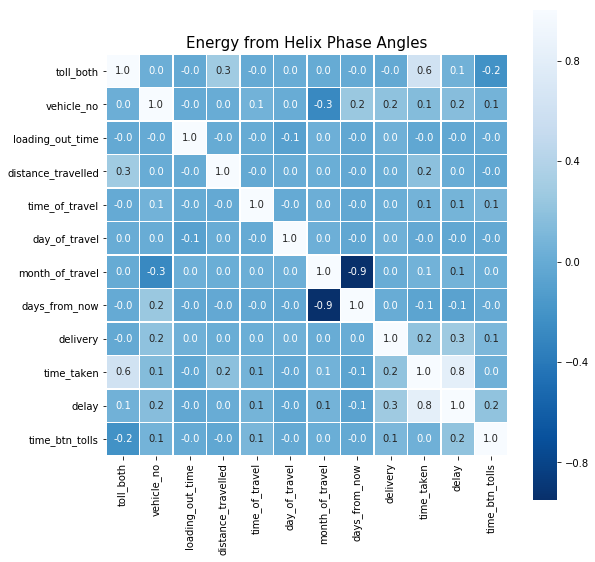

In [220]:
# seaborn heatmap documentation
# https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html

# cmap choices: http://matplotlib.org/users/colormaps.html
plt.figure(figsize=(9,9))
# pivot_table = phase_1_2.pivot('helix1 phase', 'helix 2 phase','Energy')
plt.xlabel('helix 2 phase', size = 15)
plt.ylabel('helix1 phase', size = 15)
plt.title('Energy from Helix Phase Angles', size = 15)
sns.heatmap(train_df.corr(), annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');

In [221]:
train_X = final_train_df.drop(['time_btn_tolls'], axis=1)
train_y = final_train_df.time_btn_tolls

In [222]:
scale= MinMaxScaler()
train_X_scaled = scale.fit_transform(train_X)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(train_X_scaled,train_y, test_size=0.3, random_state=42)

In [224]:
reg_mlp = MLPRegressor(activation='logistic', alpha=5, solver='lbfgs', random_state=42)

In [225]:
scores = cross_val_score(reg_mlp, train_X_scaled, train_y,
 scoring='neg_mean_squared_error', cv=5,
 n_jobs=-1)
print 'Folds: %i, mean squared error: %.2f std: %.2f' %(len(scores),np.mean(np.abs(scores)),np.std(scores))

Folds: 5, mean squared error: 63.03 std: 44.85


In [226]:
scores = cross_val_score(reg_mlp, train_X_scaled, train_y, scoring='r2', n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.52 (+/- 0.14)


In [227]:
scores = cross_val_score(reg_mlp, train_X_scaled, train_y, scoring='neg_mean_squared_error', n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -66.24 (+/- 57.29)


In [228]:
reg_mlp.fit(X_train, y_train)
reg_mlp.score(X_test, y_test)

0.59133015507508757

In [229]:
scale = MinMaxScaler()
test_X = final_test_df.drop(['time_btn_tolls'], axis=1)
X_predict_scaled = scale.fit_transform(test_X)
predictions = reg_mlp.predict(X_predict_scaled)

In [230]:
predictions

array([ 34.16033799,   8.32825411,   3.58603082,   4.57669946,
         9.5918364 ,   9.72407861,  12.17253985,  12.8693258 ,
        10.07852735,  13.48989563,   1.82312786,   5.96648253,
        11.22385084,   9.02284876,   8.92455333,  11.57800397,
        13.81348087,   2.75651629])

In [231]:
reg_mlp.coefs_

[array([[  3.52847986e-02,  -6.97595383e-02,   6.98608948e-01,
           4.73835393e-01,   6.16241515e-03,  -9.58084368e-01,
          -1.69831965e-01,  -1.44300500e-01,   3.25734743e-01,
           7.51496889e-02,   6.90315790e-01,  -3.51585019e-01,
           2.37501512e-01,  -1.62572923e-01,  -1.80798955e-01,
          -2.04687414e-01,   7.46203110e-01,   4.41763145e-01,
          -2.57146903e-01,  -2.42494919e-01,  -6.99746963e-01,
          -2.31348992e+00,   3.97649023e-01,   3.43207545e-01,
           6.38388577e-02,   2.19710256e-01,  -2.24325599e-01,
          -2.96684142e-01,   6.42411219e-01,  -5.92062259e+00,
           4.27730994e-02,  -1.44162942e-01,  -2.22622930e-01,
          -4.22463133e-01,  -1.13426832e+00,   6.80124530e-01,
           6.25778713e-01,  -6.13734601e+00,  -4.16790733e-02,
           5.32578274e-01,  -4.26723890e-01,  -3.76812716e-01,
          -4.37258600e-01,   7.61511374e-01,  -1.16246271e-01,
           5.58570101e-01,   6.74377337e-01,   2.745309

In [232]:
show_df = test_df.copy()
show_df['predicted'] = predictions

In [234]:
show_df['total_time'] = show_df['time_btn_tolls'].cumsum()

In [235]:
show_df['total_predicted'] = show_df['predicted'].cumsum()

In [236]:
show_df

,toll_both,vehicle_no,loading_out_time,ist_timestamp,distance_travelled,time_of_travel,day_of_travel,month_of_travel,days_from_now,delivery,time_taken,delay,time_btn_tolls,predicted,total_time,total_predicted
1345,1,50,2,2017-10-29 14:23:21,0.00,14,5,10,53,1,107.976667,71.690417,107.976667,34.160338,107.976667,34.160338
1346,2,50,2,2017-10-29 20:28:22,93.41,20,5,10,53,1,114.060278,73.016111,6.083611,8.328254,114.060278,42.488592
1347,3,50,2,2017-10-29 21:52:24,53.63,21,5,10,53,1,115.460833,72.841944,1.400556,3.586031,115.460833,46.074623
1348,4,50,2,2017-10-29 23:50:35,56.21,23,5,10,53,1,117.430556,73.104722,1.969722,4.576699,117.430556,50.651322
1349,5,50,2,2017-10-30 02:59:55,88.06,2,5,10,53,1,120.586111,72.833889,3.155556,9.591836,120.586111,60.243159
1350,6,50,2,2017-10-30 12:44:14,83.77,12,5,10,53,1,130.324722,75.688333,9.738611,9.724079,130.324722,69.967237
1351,9,50,2,2017-10-31 00:40:37,105.57,0,5,10,53,1,142.264444,80.652500,11.939722,12.172540,142.264444,82.139777
1352,11,50,2,2017-10-31 15:34:12,117.16,15,5,10,53,1,157.157500,88.345278,14.893056,12.869326,157.157500,95.009103
1353,12,50,2,2017-10-31 19:23:22,69.99,19,5,10,53,1,160.976944,88.294444,3.819444,10.078527,160.976944,105.087630
1354,14,50,2,2017-11-01 11:29:53,144.93,11,5,10,53,1,177.085556,97.720694,16.108611,13.489896,177.085556,118.577526


In [320]:
kalman_df = show_df[['distance_travelled','predicted']]

In [321]:
kalman_df

,distance_travelled,predicted
1345,0.00,34.160338
1346,93.41,8.328254
1347,53.63,3.586031
1348,56.21,4.576699
1349,88.06,9.591836
1350,83.77,9.724079
1351,105.57,12.172540
1352,117.16,12.869326
1353,69.99,10.078527
1354,144.93,13.489896


In [322]:
predictions

array([ 34.16033799,   8.32825411,   3.58603082,   4.57669946,
         9.5918364 ,   9.72407861,  12.17253985,  12.8693258 ,
        10.07852735,  13.48989563,   1.82312786,   5.96648253,
        11.22385084,   9.02284876,   8.92455333,  11.57800397,
        13.81348087,   2.75651629])

In [323]:
measurements = np.asarray(predictions[3:,])

In [324]:
measurements

array([  4.57669946,   9.5918364 ,   9.72407861,  12.17253985,
        12.8693258 ,  10.07852735,  13.48989563,   1.82312786,
         5.96648253,  11.22385084,   9.02284876,   8.92455333,
        11.57800397,  13.81348087,   2.75651629])

In [325]:
initial_state_mean = np.array(test_df.iloc[3])

In [326]:
initial_state_mean

array([ 56.21      ,   4.57669946])

In [354]:
final_test_df.iloc[[0,1,2,3]]

,toll_both,vehicle_no,distance_travelled,time_btn_tolls
1345,1,50,0.00,107.976667
1346,2,50,93.41,6.083611
1347,3,50,53.63,1.400556
1348,4,50,56.21,1.969722


In [333]:
transition_matrix = reg_mlp.coefs_[0]

In [357]:
observation_matrix = np.asarray(final_train_df.iloc[[0,1,2]])

In [346]:
initial_state_mean

array([ 56.21      ,   4.57669946])

In [358]:
observation_matrix

array([[   1.        ,    1.        ,    0.        ,   85.67833333],
       [   3.        ,    1.        ,  146.47      ,    6.63333333],
       [   4.        ,    1.        ,   55.83      ,    2.19222222]])

In [359]:
kf = KalmanFilter()

(filtered_state_means, filtered_state_covariances) = kf.filter_update(filtered_state_mean = [[0],[0]],
                                                                      filtered_state_covariance = [[90000,0],[0,90000]],
                                                                      observation=np.asarray([[7],[2],[14]]),
                                                                      transition_matrix = np.asarray([[1,0],[0,1]]),
                                                                      observation_matrix = np.asarray([[2,1],[0,1],[5,1]]))

ValueError: shapes (3,4) and (2,1) not aligned: 4 (dim 1) != 2 (dim 0)

In [356]:
filtered_state_means

masked_array(data =
 [[ 2.39473719]
 [ 2.0789453 ]],
             mask =
 False,
       fill_value = 1e+20)

In [347]:
filter_update(filtered_state_mean, filtered_state_covariance, observation=None, transition_matrix=None, 
              transition_offset=None, transition_covariance=None, observation_matrix=None, 
              observation_offset=None, observation_covariance=None)


NameError: name 'filter_update' is not defined

In [344]:
kf1 = KalmanFilter(transition_matrices = transition_matrix,
                  initial_state_mean = initial_state_mean)

ValueError: The shape of all parameters is not consistent.  Please re-check their values.

In [268]:
kf1 = kf1.em(measurements, n_iter=5)
(smoothed_state_means, smoothed_state_covariances) = kf1.smooth(measurements)

NameError: name 'kf1' is not defined

In [312]:
trace = go.Scatter(
    x = train_df['distance_travelled'].tolist(),
    y = train_df['time_btn_tolls'].apply(lambda x:x*60),
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

In [304]:
from pandas_datareader import data
secs = ['EWA', 'EWC']
data = data.DataReader(secs, 'yahoo', '2010-1-1', '2014-8-1')['Adj Close']

In [307]:
data

,EWA,EWC
Date,,
2014-08-01,22.840326,29.960068
2014-07-31,22.987291,30.251669
2014-07-30,23.281225,30.674969
2014-07-29,23.263933,30.580898
2014-07-28,23.298517,30.740816
2014-07-25,23.212065,30.712595
2014-07-24,23.359030,30.778442
2014-07-23,23.428192,30.797255
2014-07-22,23.177485,30.646749


In [319]:
obs_mat = np.vstack([data['EWA'], np.ones(data['EWA'].shape)]).T[:, np.newaxis]

TypeError: list indices must be integers, not str